In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# notes: scanpy has several versions, afer 17May2020, it become 1.5.1 from 1.4.6
!pip install scanpy
!pip install leidenalg

In [0]:
#!pip install bbknn==1.3.6
#pip install umap-learn==0.3.9

In [3]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# notice that scanpy already became 1.5.1 after 17May2020
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, figsize=(6, 6))

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.18.5 scipy==1.4.1 pandas==1.0.4 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 leidenalg==0.8.0


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data")

In [0]:
%ls -lth

In [0]:
adata= sc.read_h5ad("hypothalamic.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 19182 × 4771
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'leiden', 'leiden_0.2_colors', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [0]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


In [0]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


In [0]:
sc.pl.umap(adata, color=["MAP2", "NKX2-1", "POMC", "OTP"], size=15)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# no difference compared to the above figure, because i didn't using linear regression to do regressionout in the preprocessing, although I did scaling
sc.pl.umap(adata, color=["MAP2", "NKX2-1", "POMC", "OTP"], use_raw=False, size=15)

Output hidden; open in https://colab.research.google.com to view.

## Check the clustering

In [0]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 29 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


In [0]:
sc.tl.leiden(adata, resolution=0.6, key_added="leiden_0.6")

running Leiden clustering
    finished: found 21 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:06)


In [0]:
sc.tl.leiden(adata, resolution=0.4, key_added="leiden_0.4")

running Leiden clustering
    finished: found 16 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:06)


In [0]:
sc.tl.leiden(adata, resolution=0.2, key_added="leiden_0.2")
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_0.1")


running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:05)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:02)


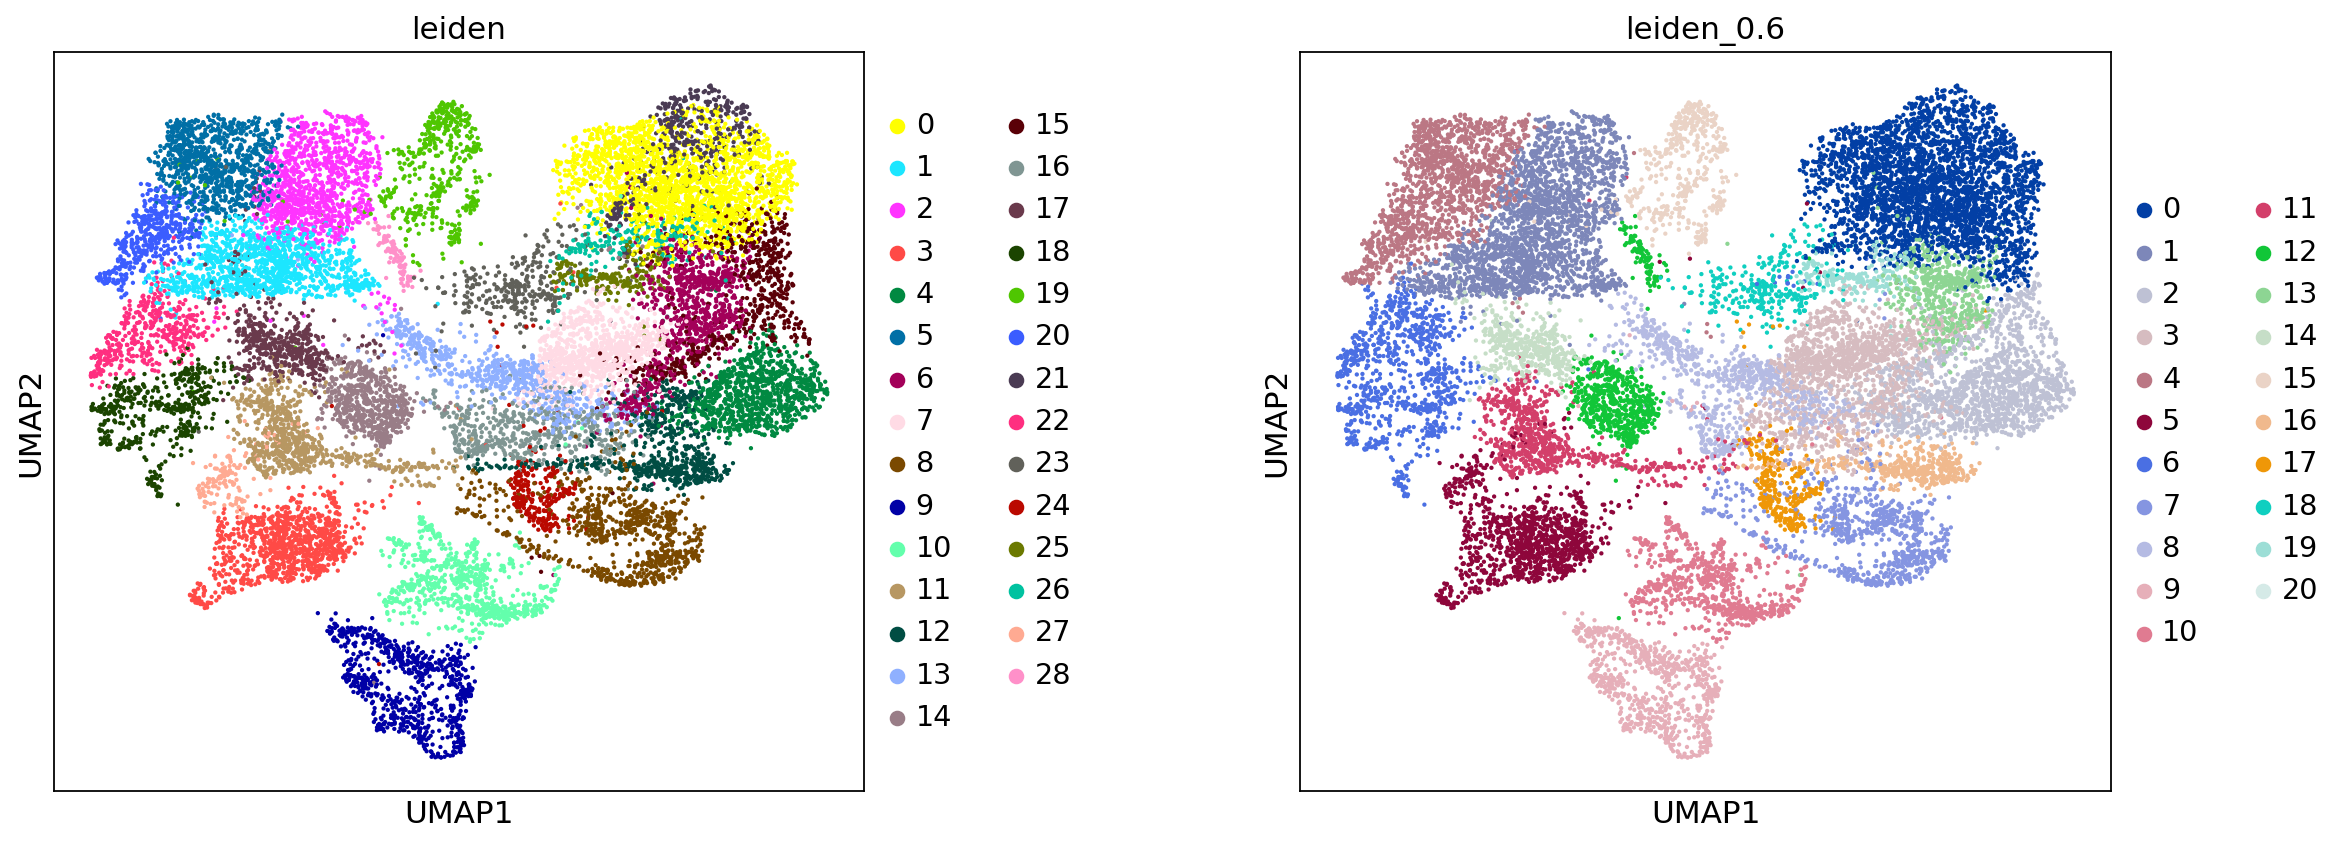

In [0]:
sc.pl.umap(adata, color=["leiden", "leiden_0.6"], wspace=0.4, size=15)

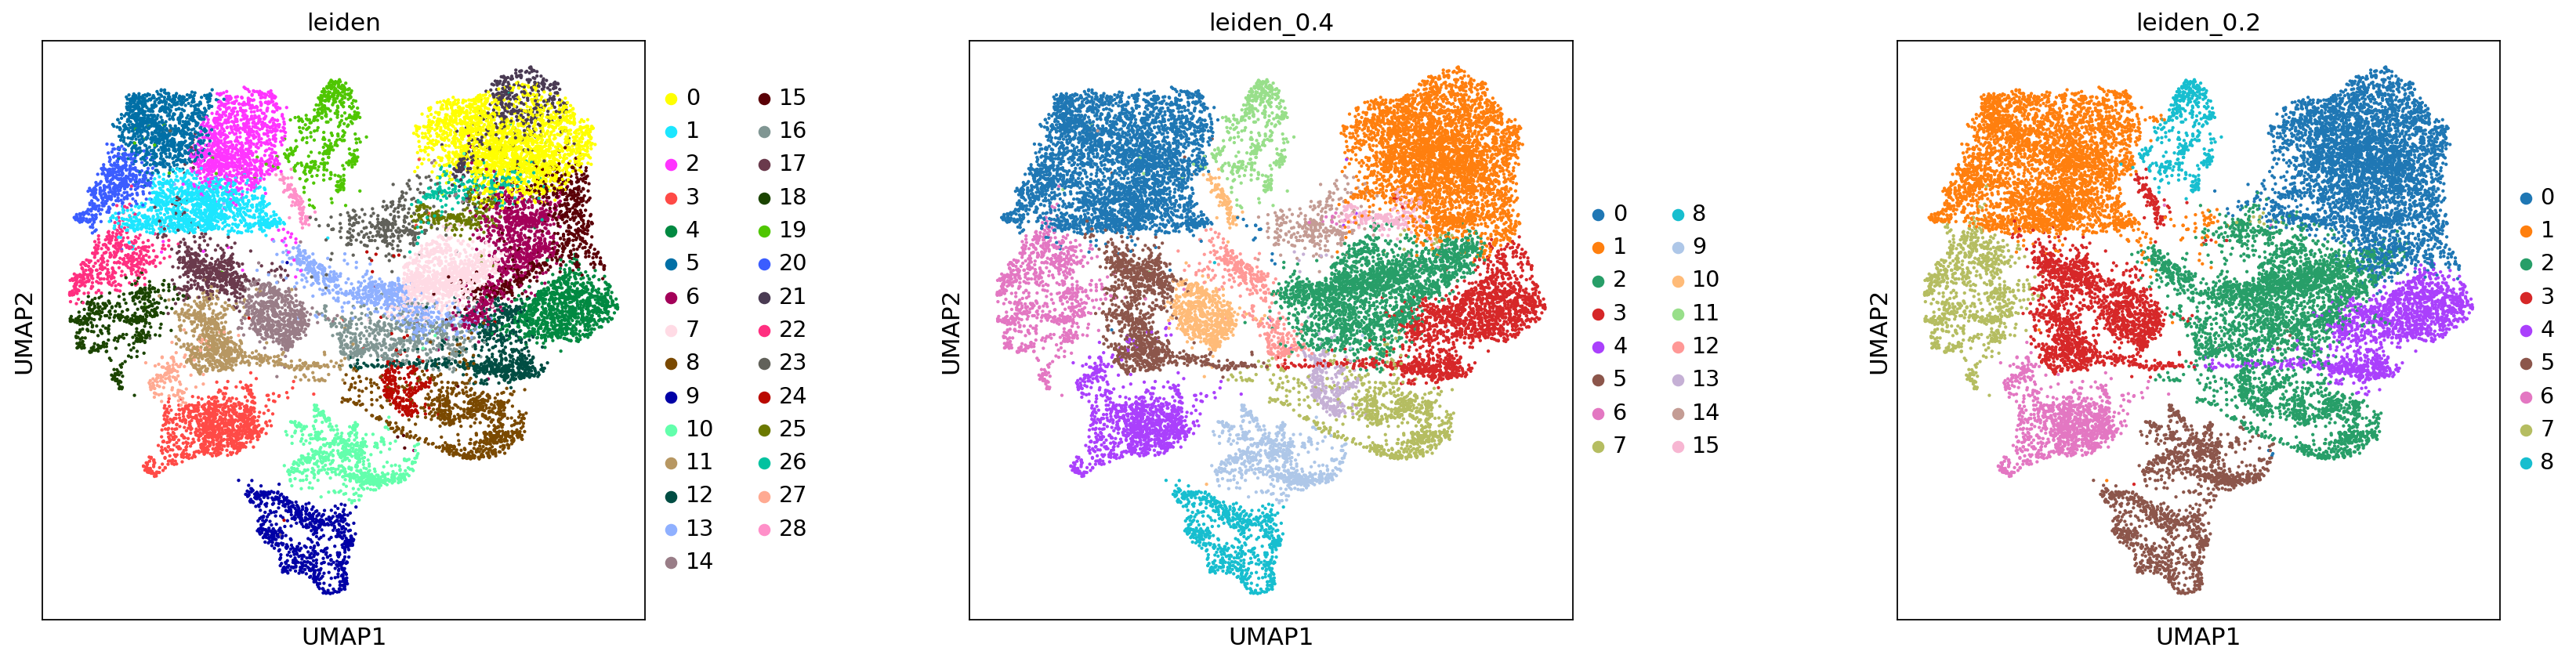

In [0]:
sc.pl.umap(adata, color=["leiden", "leiden_0.4", "leiden_0.2"], wspace=0.4, save="_hypthalamic", size=15)

In [0]:
adata.write("hypothalamic.h5ad")

In [0]:
sc.tl.paga(adata)
sc.pl.paga(data, plot=False)

ValueError: ignored

In [0]:
#palette=sc.pl.palettes.vega_20_scanpy, 
sc.pl.umap(adata, color=['batch', 'leiden'], wspace=0.6)

In [0]:
batch_name = adata.obs.batch.value_counts().index.to_list()
batch_name =['cortical_1','cortical_2','dopaminergic_1','dopaminergic_2','hypothalamic_1','hypothalamic_2'
 'dopaminergic_2',
 'cortical_1',
 'dopaminergic_1',
 'hypothalamic_2',
 'hypothalamic_1']

['cortical_2',
 'dopaminergic_2',
 'cortical_1',
 'dopaminergic_1',
 'hypothalamic_2',
 'hypothalamic_1']

Trying to set attribute `.uns` of view, copying.


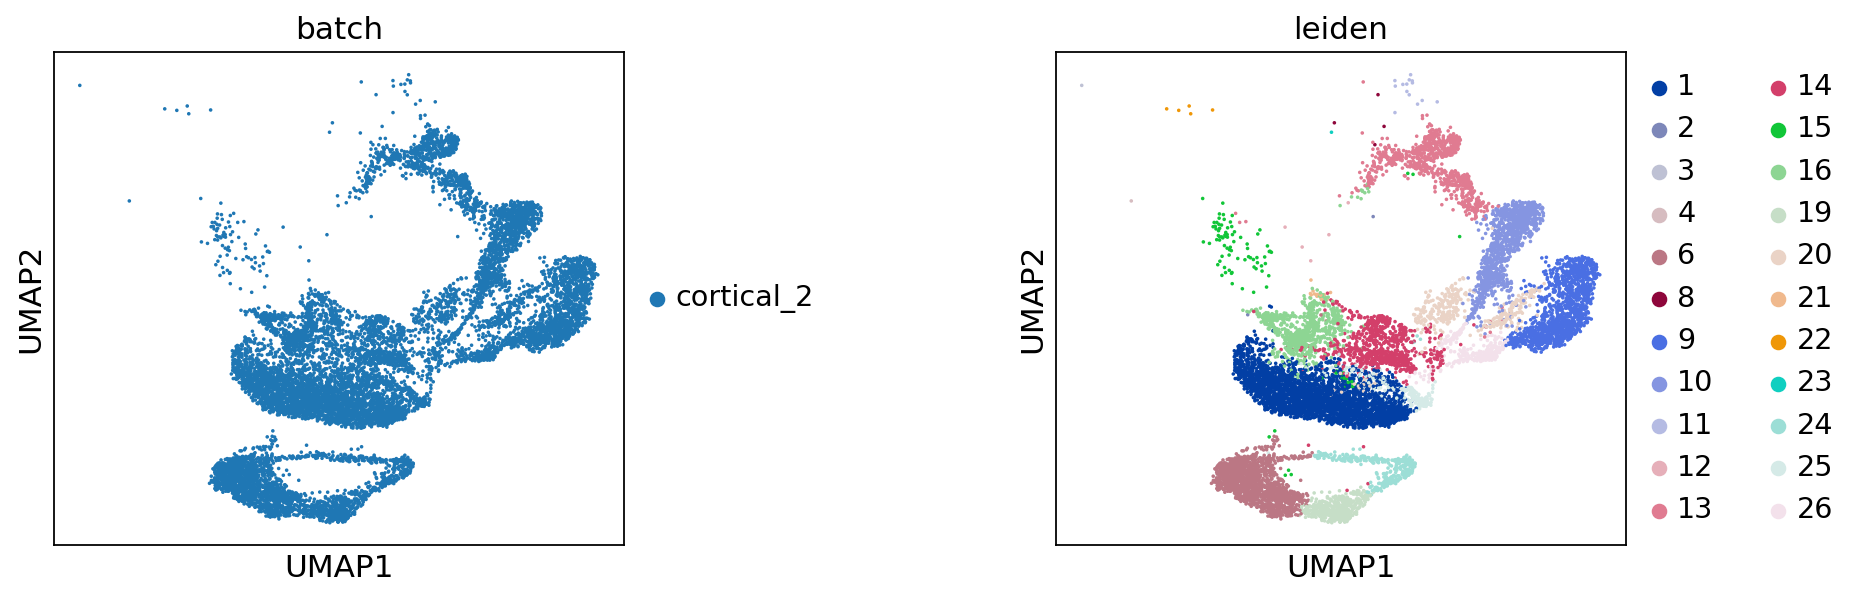

Trying to set attribute `.uns` of view, copying.


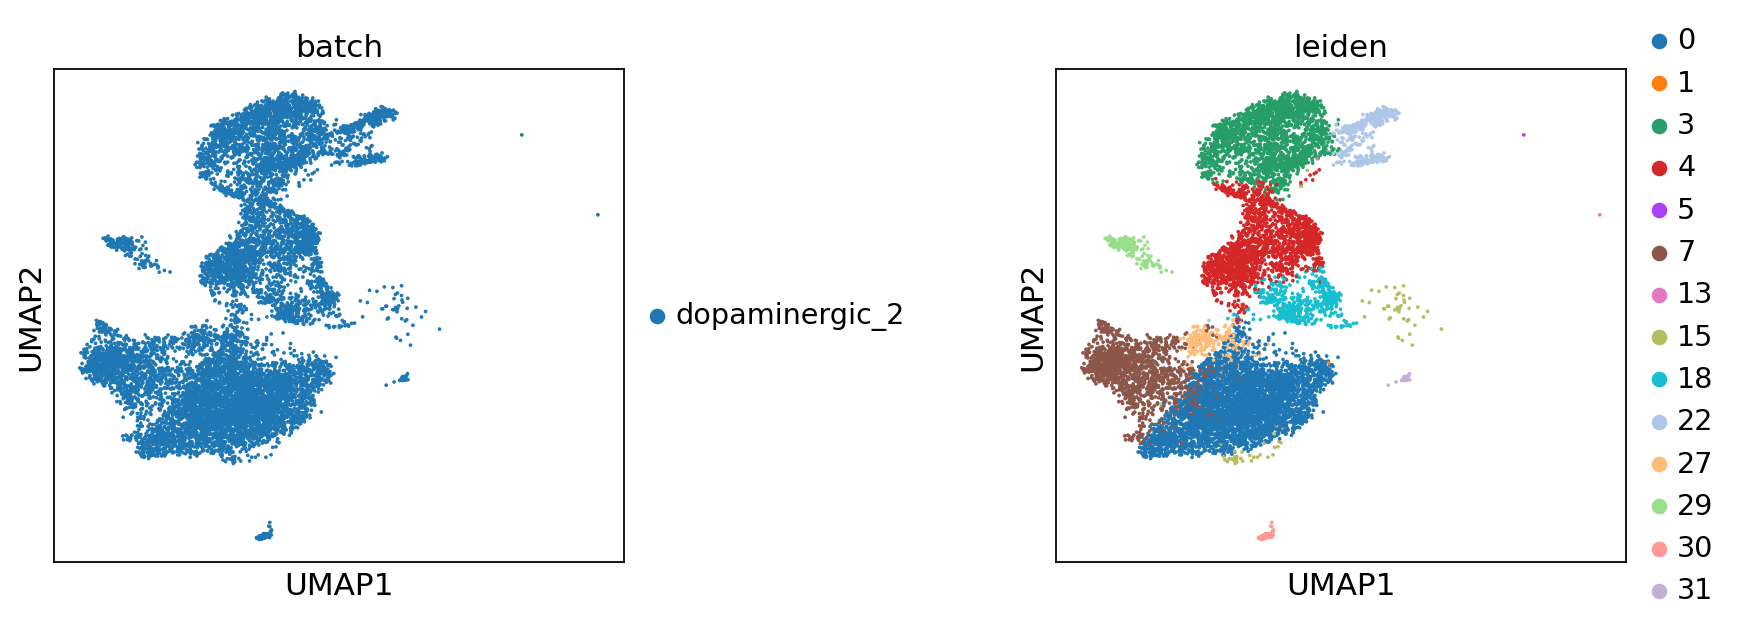

Trying to set attribute `.uns` of view, copying.


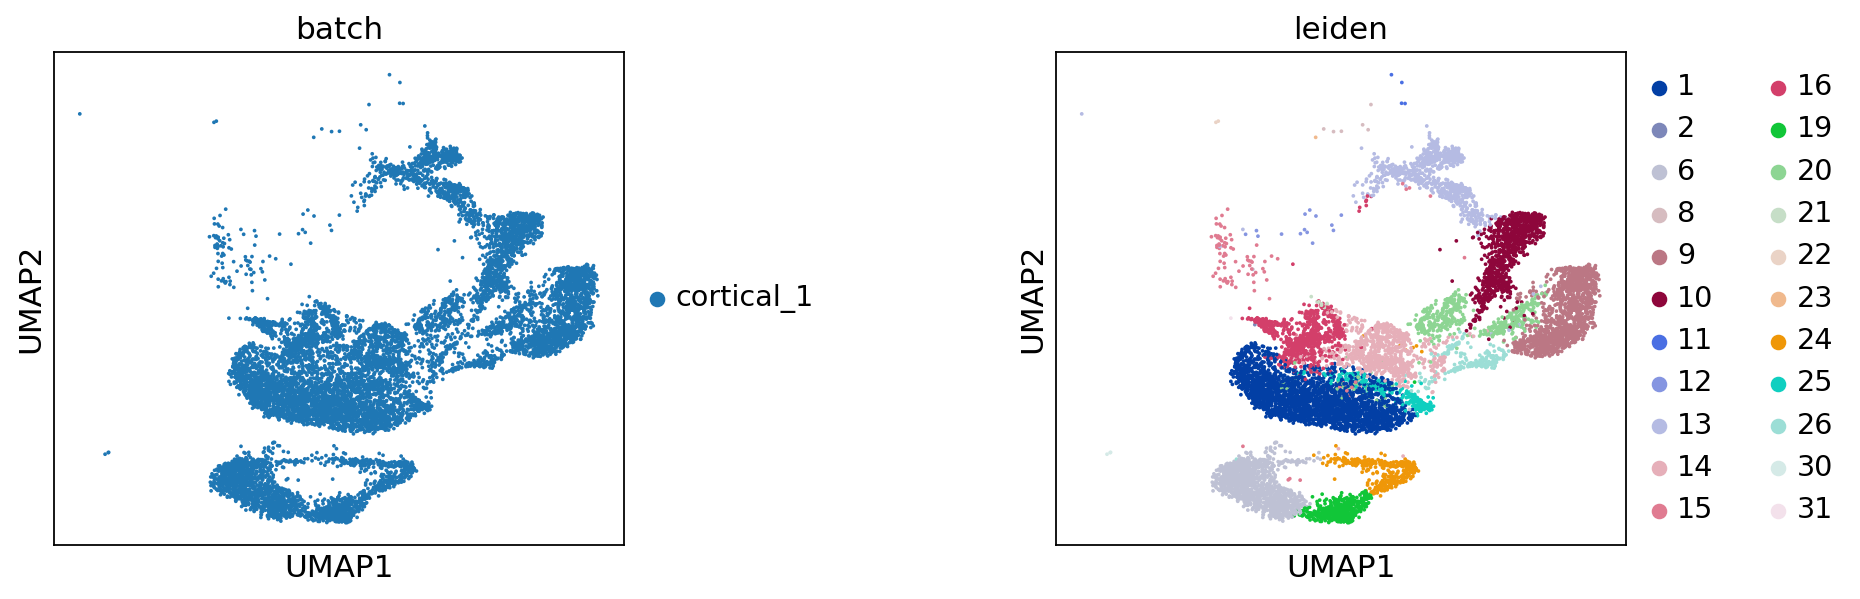

Trying to set attribute `.uns` of view, copying.


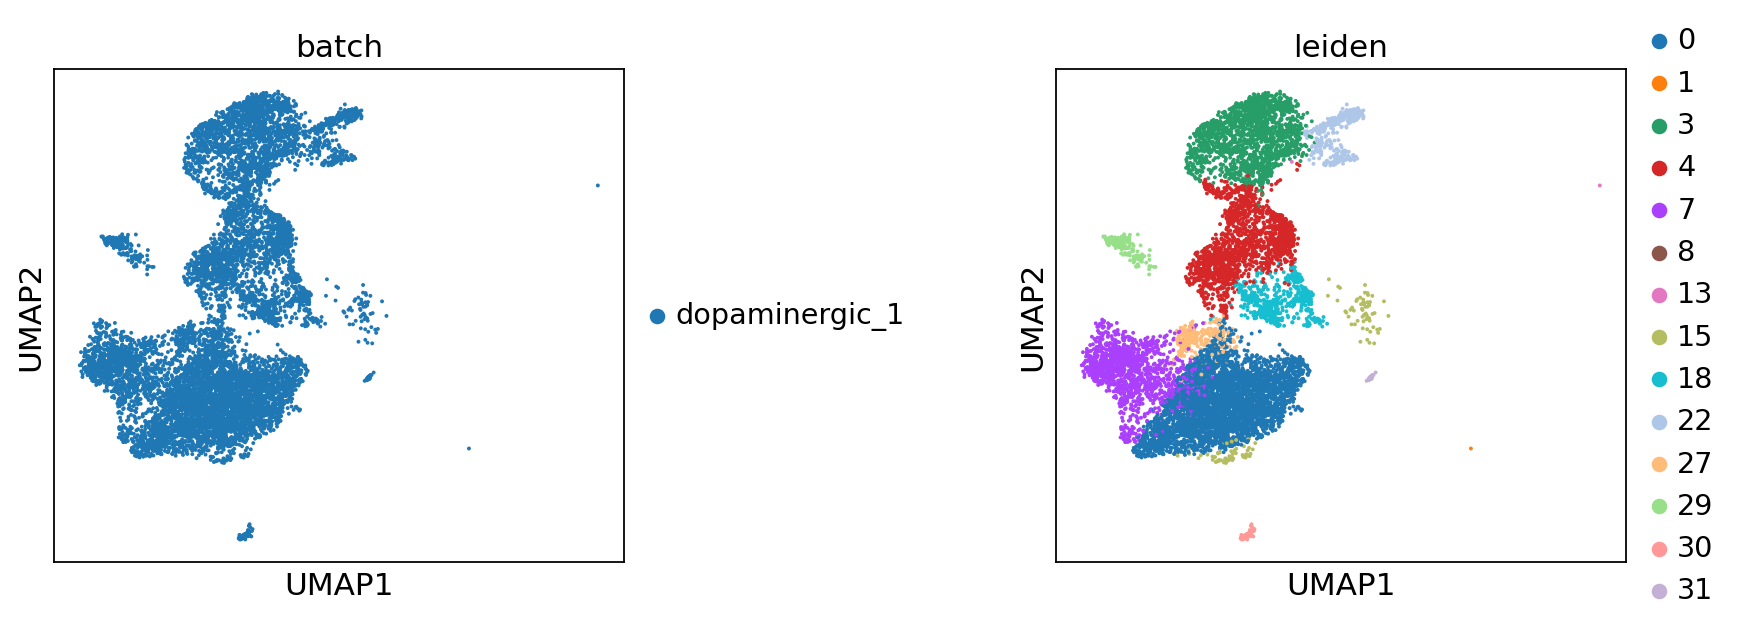

Trying to set attribute `.uns` of view, copying.


Trying to set attribute `.uns` of view, copying.


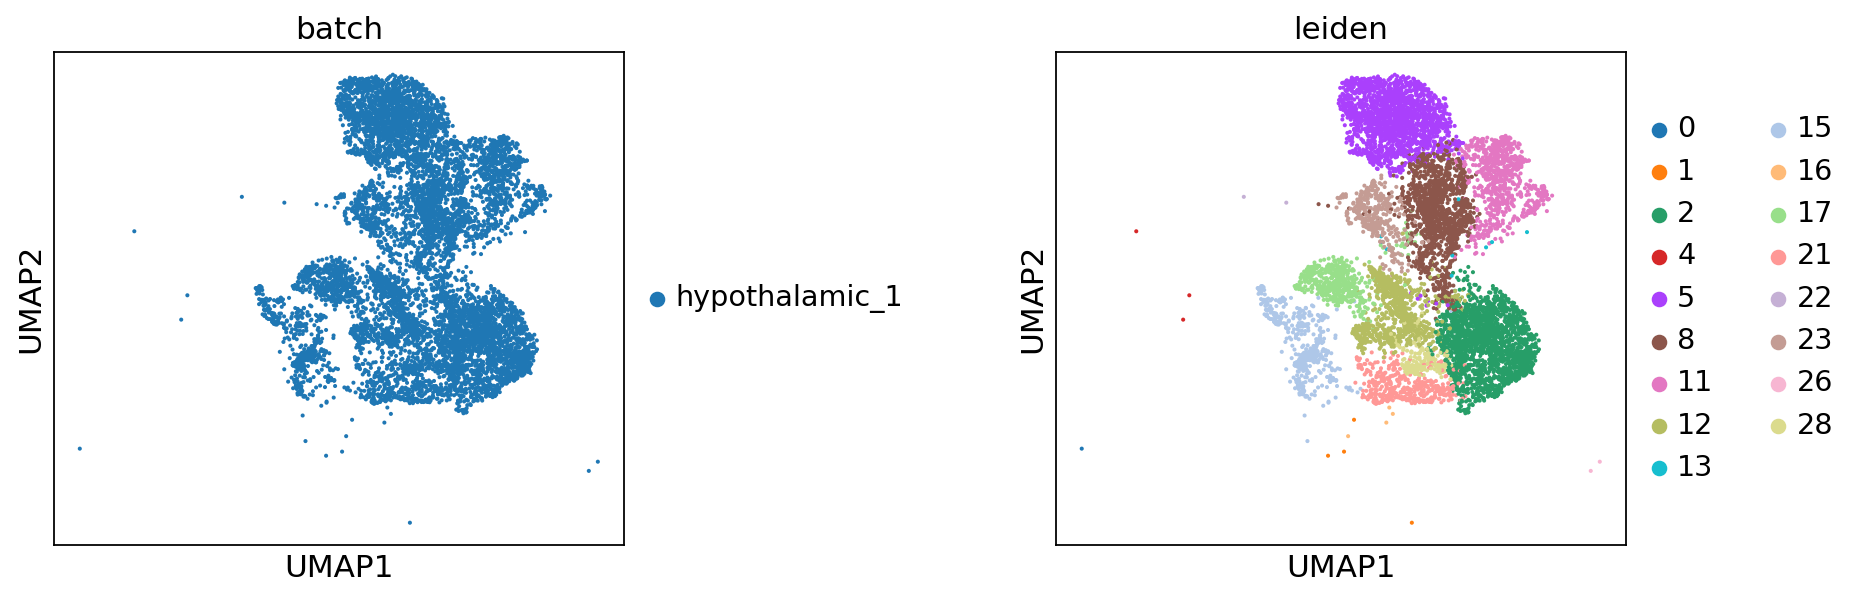

In [0]:

for batch in batch_name:
  sc.pl.umap(adata[adata.obs["batch"]==batch,:],color=['batch', 'leiden'], wspace=0.6, title=batch )

In [0]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6'], wspace=0.7)

In [0]:
sc.settings.set_figure_params(dpi=80,figsize=(4, 4))

Trying to set attribute `.uns` of view, copying.


Trying to set attribute `.uns` of view, copying.


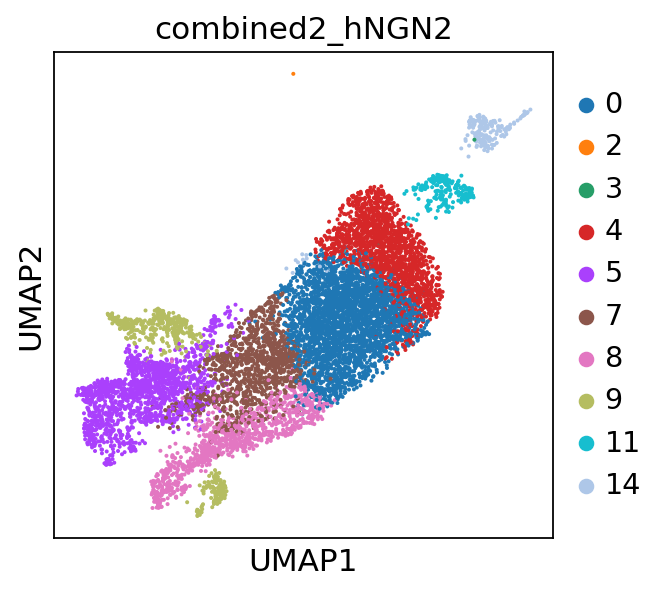

Trying to set attribute `.uns` of view, copying.


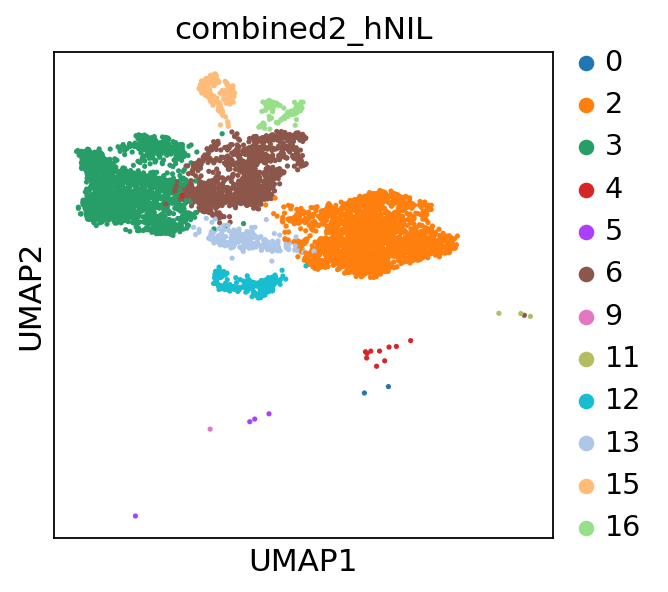

In [0]:
sc.pl.umap(adata[adata.obs.batch=="pool_iPSC"], color=['leiden_0.6'], title="pool_iPSC")
sc.pl.umap(adata[adata.obs.batch=="combined2_hNGN2"], color=['leiden_0.6'], title="combined2_hNGN2")
sc.pl.umap(adata[adata.obs.batch=="combined2_hNIL"], color=['leiden_0.6'], title="combined2_hNIL")

First inspection of the marker gene plots shows that cluster 11 is indeed characterized by high expression of mitochondrial genes. Together with the low counts this suggests a 'stressed' phenotype.

In [0]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:32)


In [0]:
adata.write("concat3_donor_leiden_24May2020.h5ad")

In [0]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0           1        2       3  ...      14       15       16      17
0  NEUROG2        NPM1     NEFL    DLK1  ...     PTN    POSTN   LGALS1   RPLP1
1     HES6       HMGA1     NEFM     VIM  ...     VIM   LGALS1  S100A11   RPS12
2  PPP1R17  AC106864.1     SNCG     MDK  ...  MARCKS      VIM      MDK  RPL18A
3   HOMER3      POU5F1  ONECUT2   NEAT1  ...   TTYH1      FTL      VIM   GAPDH
4      HBD    HSP90AB1    MAP1B    BST2  ...    ZIC1   COL5A2   COL1A2   RPLP0
5     DLL3       HSPD1    UCHL1    ODC1  ...   FABP7     PLP1    ACTG1   RPL12
6     CD81       L1TD1    GAP43  IGFBP2  ...   SPRY1   IGFBP5   CRABP2  RPS27A
7  SLC17A7         TKT     RTN1  CRABP2  ...   HMGB1  COL18A1   PCOLCE     NCL
8      SYP       TERF1   MT-ND5  CRABP1  ...   HMGN2    ANXA2     TPT1    NPM1
9   MT-ND3       RPLP1      VGF     FTL  ...   RPS27   COL1A2     VCAN    PFN1

[10 rows x 18 columns]

In [0]:
gene_list = pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[0, :].values


In [0]:
gene_list = ['NEUROG2', 'NPM1', 'NEFL', 'DLK1', 'DLL3', 'ONECUT3', 'MDK',
       'BASP1', 'TMSB10', 'ID4', 'UTF1', 'HMGN2', 'CRABP1', 'CRABP1',
       'PTN', 'POSTN', 'LGALS1', 'RPLP1']

In [0]:
sc.settings.set_figure_params(dpi=80, figsize=(10, 4))
for gene in gene_list:
  print(gene)
  sc.pl.violin(adata, gene, groupby='leiden_0.6')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))
for gene in gene_list:
  print(gene)
  sc.pl.umap(adata, color=['leiden_0.6', gene], wspace=0.5)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
marker_df = pd.read_csv("integrated_data/PanglaoDB_markers_27_Mar_2020_delete1.csv")

In [0]:
# Description: Interneurons create neural circuits, enabling communication between sensory or motor neurons and the central nervous system.
# Description: Neurons of the Trigeminal ganglion (relaying sensation in the face and motor functions).
# Description: A neuroblast is a postmitotic cell that does not divide further and which will develop into a neuron after a migration phase. 
# Neuroblasts differentiate from neural stem cells and are committed to become neurons.

In [0]:
cell_types = ['Dopaminergic neurons', 'GABAergic neurons', 'Glutaminergic neurons', 'Glycinergic neurons', 'Immature neurons', 
'Interneurons', 'Motor neurons', 'Neural stem/precursor cells', 'Neurons', 'Noradrenergic neurons', 'Neuroblasts', 'Neuroendocrine cells', 
'Adrenergic neurons', 'Cholinergic neurons', 'Noradrenergic neurons', 'Purkinje neurons', 'Serotonergic neurons', 'Trigeminal neurons']

In [0]:
marker_dic = {}
for type in cell_types:
  marker_dic[type] = marker_df[marker_df["cell type"] == type]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups')

In [0]:
cell_annotation

0    1    2    3    4  ...   13   14   15   16   17
Dopaminergic neurons         1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0  0.0
GABAergic neurons            0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0
Glutaminergic neurons        1.0  0.0  1.0  0.0  1.0  ...  1.0  0.0  0.0  1.0  0.0
Glycinergic neurons          0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Immature neurons             2.0  0.0  2.0  1.0  1.0  ...  1.0  1.0  0.0  0.0  0.0
Interneurons                 5.0  1.0  4.0  0.0  2.0  ...  2.0  0.0  0.0  1.0  0.0
Motor neurons                0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Neural stem/precursor cells  6.0  1.0  1.0  2.0  3.0  ...  1.0  6.0  1.0  0.0  0.0
Neurons                      7.0  0.0  9.0  0.0  3.0  ...  6.0  1.0  1.0  0.0  0.0
Noradrenergic neurons        0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0
Neuroblasts                  3.0  0.0  6.0  0.0  2.0  ...  0.0  1.0  0.0  1.0  0.0
Neuroendocrine cells         0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Adrenergic neurons           0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0  0.0
Cholinergic neurons          0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Purkinje neurons             1.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0  0.0
Serotonergic neurons         0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Trigeminal neurons           0.0  0.0  2.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0

[17 rows x 18 columns]

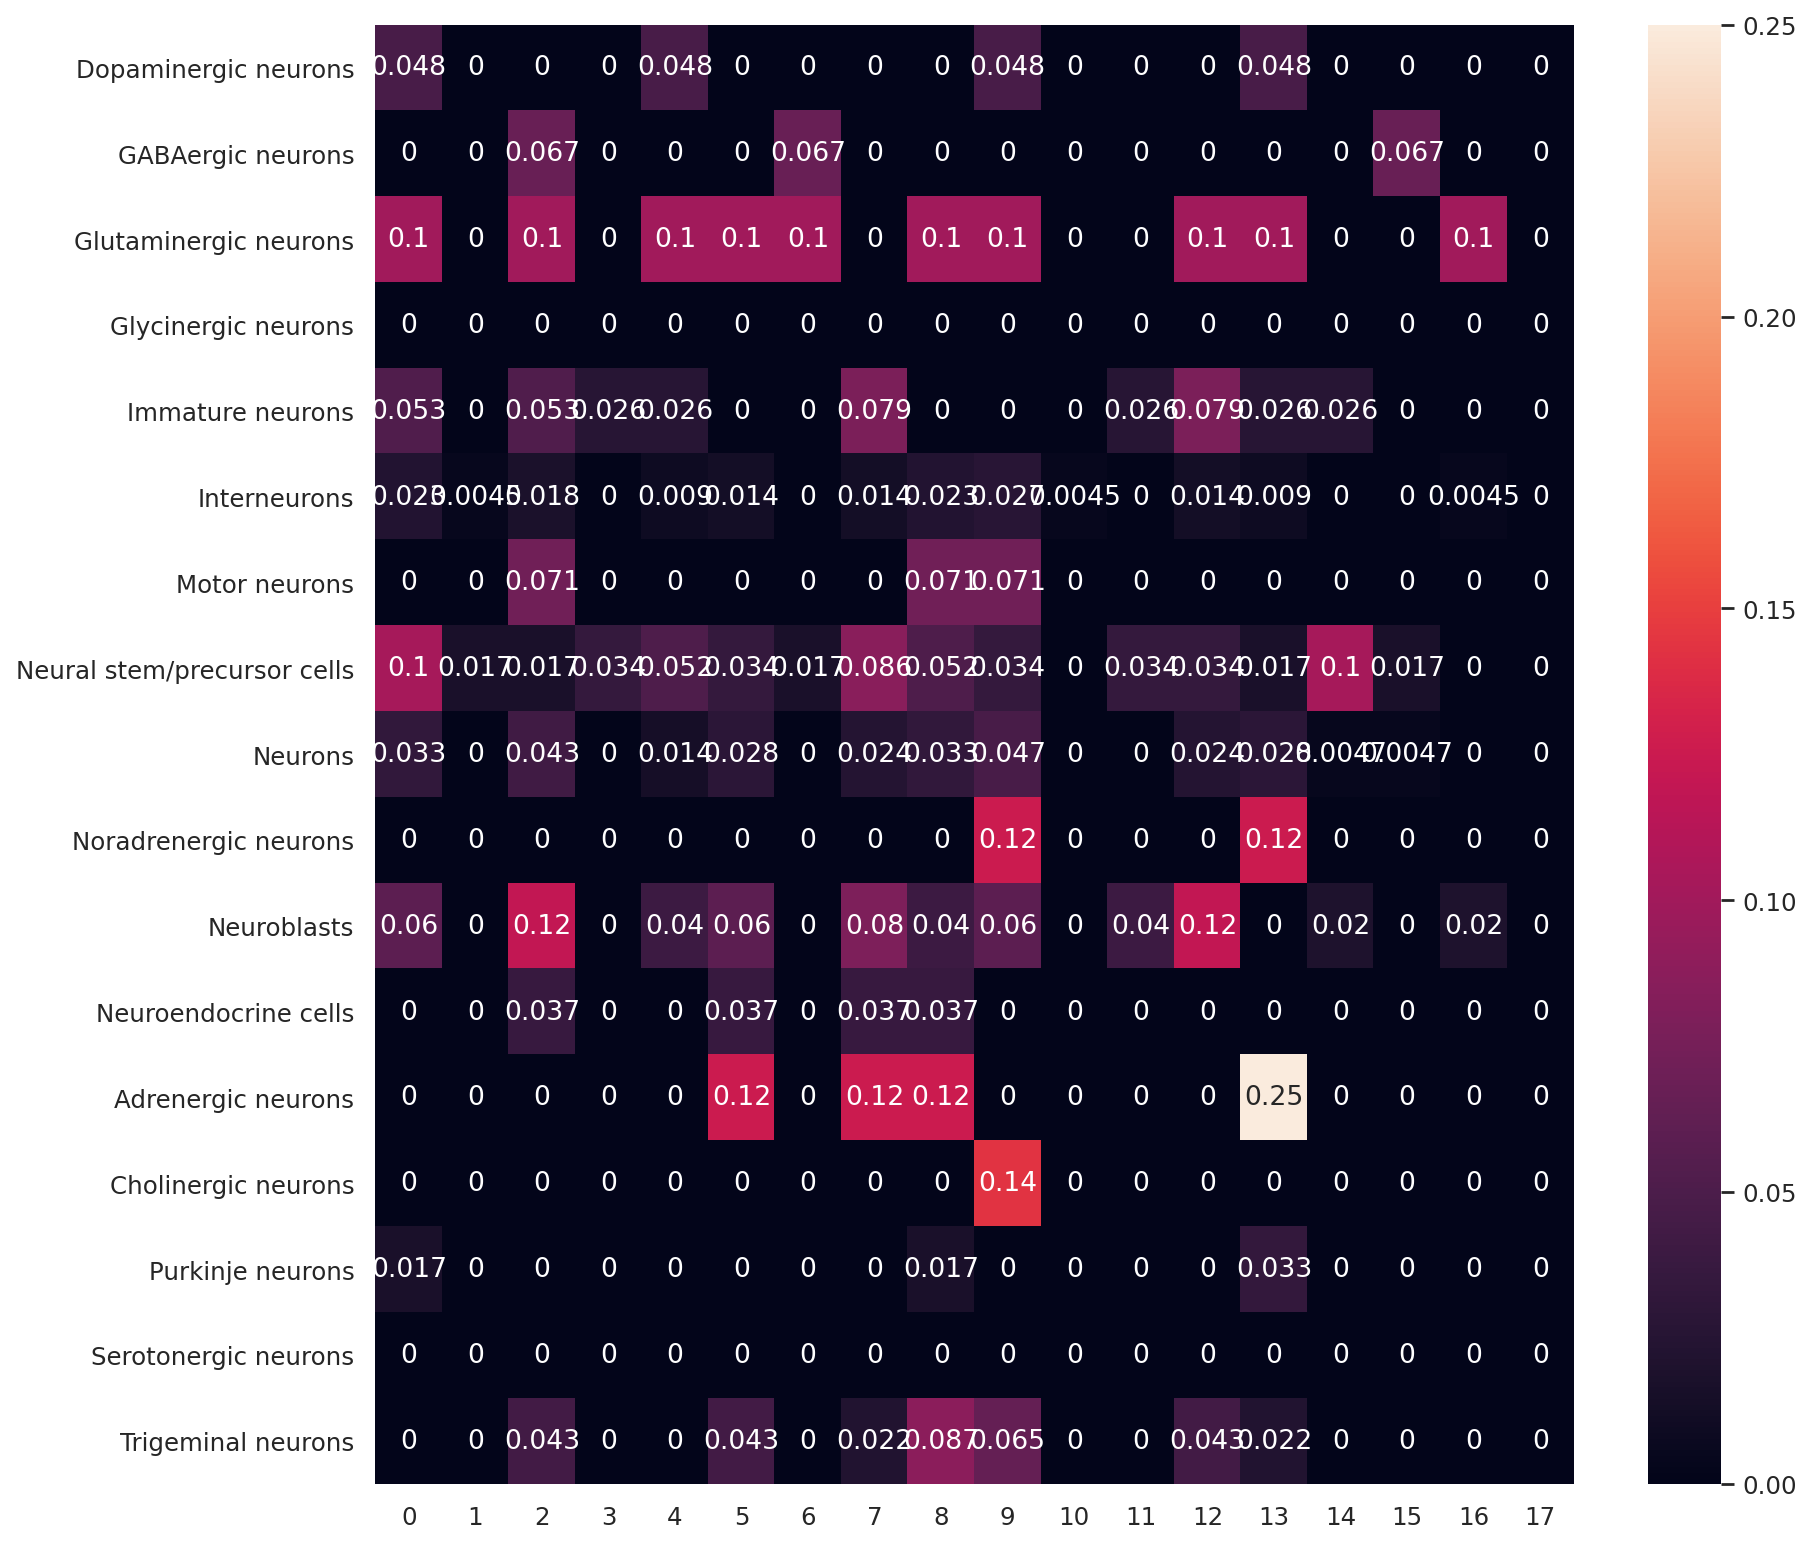

In [0]:

import seaborn as sb
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups', normalize='reference')
sb.set(rc={'figure.figsize':(12, 12)})
# cbar=False, 
sb.heatmap(cell_annotation_norm, annot=True)

In [0]:
## ???refine known markers by only choose those only mainly expressed in less than 2 cell types
marker_dic2 = {}
for type in cell_types:
  marker_dic2[type] = marker_df[(marker_df["cell type"] == type) & (marker_df[""]) ]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic2, key='rank_genes_groups')
cell_annotation

# Annotation

mixed, Glutaminergic neurons, Interneurons/precursor, Adrenergic neurons, mixed,

In [0]:
# reassing the cluster names
adata.rename_categories('leiden_0.4', ['TA', 'EP (early)', 'Stem', 'Goblet', 'EP (stress)', 'Enterocyte', 'Paneth', 'Enteroendocrine', 'Tuft'])

simply at the fraction of known marker genes that are found in the cluster marker gene sets from the rank_genes_groups() function.

In [0]:
#not execulte yet
out_dir = 'integrated_data/iPSC_combined2_hNGN2_NIL_13May2020.h5d'
adata.write(out_dir)